In [68]:
##Social Network ADS

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



In [5]:
df1 = pd.read_csv(r'/Users/mrinalpatil/Desktop/Social_Network_Ads.csv')
df1.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
df1.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df1.shape

(400, 5)

In [8]:
df1.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df1.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [11]:
df1.drop(columns=['User ID'],inplace=True)

In [14]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Female    204
Male      196
Name: Gender, dtype: int64

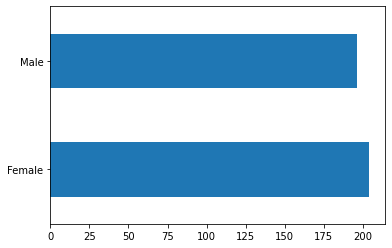

In [15]:
df1.Gender.value_counts().plot(kind="barh");
df1.Gender.value_counts()

In [66]:
##Dist Plot

/Users/mrinalpatil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

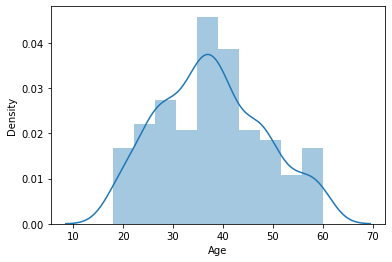

In [16]:
sns.distplot(df1.Age)

In [69]:
## Pair plot

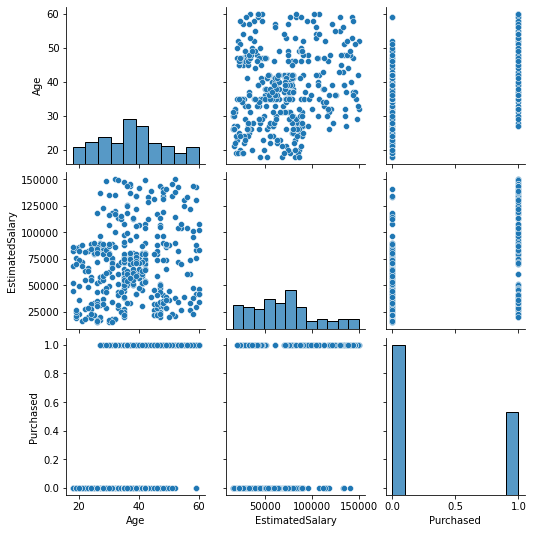

In [70]:
sns.pairplot(df1)

In [65]:
###BOX PLOT

<AxesSubplot:xlabel='Gender', ylabel='Age'>

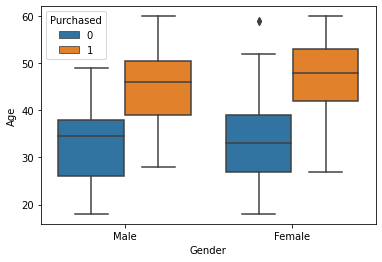

In [18]:
sns.boxplot(y='Age', x='Gender',data=df1,hue='Purchased')

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

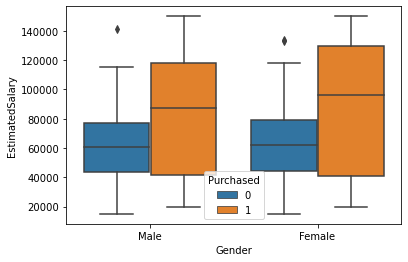

In [19]:
sns.boxplot(y='EstimatedSalary', x='Gender',data=df1,hue='Purchased')

In [12]:
df1.groupby(by=['Gender','Age']).mean()

EstimatedSalary  Purchased
Gender Age                            
Female 18      66000.000000        0.0
       19      23500.000000        0.0
       20      55750.000000        0.0
       21      42000.000000        0.0
       22      48333.333333        0.0
...                     ...        ...
Male   56      96500.000000        1.0
       57      67000.000000        1.0
       58     144000.000000        1.0
       59     136500.000000        1.0
       60      60600.000000        1.0

[83 rows x 2 columns]

In [64]:
##Splitting 

In [21]:
X = df1.iloc[:, :-1].values 
y = df1.iloc[:, -1].values 

In [63]:
## Encoding


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0]= le.fit_transform(X[:,0])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [24]:
X.shape

(400, 3)

In [25]:
y.shape

(400,)

In [62]:
# Scaling

In [27]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [61]:
##KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
pred = knn.predict(X_test)

In [31]:
print(confusion_matrix(y_test, pred))

[[73  6]
 [ 4 37]]


In [32]:
print(accuracy_score(y_test,pred))

0.9166666666666666


In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



In [34]:
accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=5)
    accuracy_rate.append

In [35]:
s=()
s1=[]
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    Y_pred=knn.predict(X_test)
    s=[accuracy_score(y_test,Y_pred)]
    s1.append(s)
    print(k,s)
    k+=1
    

1 [0.9083333333333333]
2 [0.875]
3 [0.925]
4 [0.9083333333333333]
5 [0.9166666666666666]
6 [0.925]
7 [0.9166666666666666]
8 [0.925]
9 [0.9166666666666666]
10 [0.925]
11 [0.9166666666666666]
12 [0.9166666666666666]
13 [0.9166666666666666]
14 [0.9166666666666666]
15 [0.9166666666666666]
16 [0.9166666666666666]
17 [0.9166666666666666]
18 [0.9166666666666666]
19 [0.9166666666666666]
20 [0.9083333333333333]
21 [0.9166666666666666]
22 [0.8833333333333333]
23 [0.8916666666666667]
24 [0.8916666666666667]
25 [0.8916666666666667]
26 [0.8833333333333333]
27 [0.8833333333333333]
28 [0.875]
29 [0.875]
30 [0.8666666666666667]
31 [0.8666666666666667]
32 [0.8666666666666667]
33 [0.8666666666666667]
34 [0.8666666666666667]
35 [0.875]
36 [0.8583333333333333]
37 [0.8583333333333333]
38 [0.8583333333333333]
39 [0.8583333333333333]


In [59]:
auc = metrics.roc_auc_score(y_test, pred)
print("roc_auc score for KNN model is :", auc*100)
pre=metrics.precision_score(y_test,pred)
print("precision score for KNN :",pre*100)
f1S = metrics.f1_score(y_test,pred)
print("F1 score for KNN is:",f1S*100)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test,pred)
print("rmse for KNN is :",rmse*100)

roc_auc score for KNN model is : 91.32448286508182
precision score for KNN : 86.04651162790698
F1 score for KNN is: 88.09523809523809
rmse for KNN is : 8.333333333333332


In [36]:
max(s1)

[0.925]

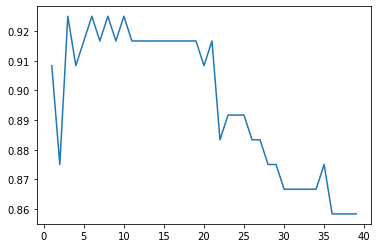

In [37]:
plt.plot(range(1,40),s1)
plt.show()

In [60]:
### GaussianNB

In [41]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [42]:
pred1 = GNB.predict(X_test)

In [43]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [44]:
print(confusion_matrix(y_test, pred1))

[[76  3]
 [ 8 33]]


In [45]:
print(accuracy_score(y_test,pred1))

0.9083333333333333


In [48]:
from sklearn import metrics
auc1 = metrics.roc_auc_score(y_test, pred1)
print("roc_auc score for GaussianNB model is :", auc1)

roc_auc score for GaussianNB model is : 0.883451682618092


In [54]:
pre1=metrics.precision_score(y_test,pred1)
print("precision score for GaussianNB :",pre1*100)

precision score for GaussianNB : 91.66666666666666


In [55]:
f1S1 = metrics.f1_score(y_test,pred1)
print("F1 score for GaussianNB is:",f1S1*100)

F1 score for GaussianNB is: 85.71428571428571


In [56]:
from sklearn.metrics import mean_squared_error
rmse1=mean_squared_error(y_test,pred1)
print("rmse for GaussianNB is :",rmse1*100)

rmse for GaussianNB is : 9.166666666666666


In [71]:
####Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred2 = dt.predict(X_test)

In [75]:
pred2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [77]:
acc2=accuracy_score(y_test,pred2)
print("Accuracy score for DT is:",acc2*100)
auc2 = metrics.roc_auc_score(y_test, pred2)
print("roc_auc score for DT model is :", auc2*100)
pre2=metrics.precision_score(y_test,pred2)
print("precision score for DT :",pre2*100)
f1S2 = metrics.f1_score(y_test,pred2)
print("F1 score for DT is:",f1S2*100)
from sklearn.metrics import mean_squared_error
rmse2=mean_squared_error(y_test,pred2)
print("rmse for DT is :",rmse2*100)

Accuracy score for DT is: 87.5
roc_auc score for DT model is : 86.40012349490583
precision score for DT : 80.95238095238095
F1 score for DT is: 81.92771084337348
rmse for DT is : 12.5
